# Import and Setups

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import paths
sys.path = ['', '/Users/jin/code/work/arb', '/usr/local/bin', '/Users/jin/virtualenvs/arb/lib/python27.zip', '/Users/jin/virtualenvs/arb/lib/python2.7', '/Users/jin/virtualenvs/arb/lib/python2.7/plat-darwin', '/Users/jin/virtualenvs/arb/lib/python2.7/plat-mac', '/Users/jin/virtualenvs/arb/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/jin/virtualenvs/arb/lib/python2.7/lib-tk', '/Users/jin/virtualenvs/arb/lib/python2.7/lib-old', '/Users/jin/virtualenvs/arb/lib/python2.7/lib-dynload', '/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/jin/virtualenvs/arb/lib/python2.7/site-packages', '/Users/jin/virtualenvs/arb/lib/python2.7/site-packages/IPython/extensions', '/Users/jin/.ipython']

from arb.utils import epoch
print epoch.to_long("2017-08-21 20:00:00 PDT")

print epoch.to_long("2017-10-23 17:30:00 PDT")
print epoch.to_long("2017-10-23 19:30:00 PDT")

color_light_gray = '#aeafaf'
color_gray = '#618299'
color_teal_light = '#00b3b3'
color_teal = '#049696'
color_teal_dark = '#006767'


INFO|__init__|257|---------------------------------------------------------
INFO|__init__|258|Initialization path: : /Users/jin/code/work/arb/arb
INFO|__init__|259|Root path: /Users/jin/code/work/arb
INFO|__init__|260|Working dir path: : /Users/jin/code/work/arb
INFO|__init__|261|Log file: : /Users/jin/code/work/arb/logs/arb.log
INFO|__init__|262|---------------------------------------------------------


1503370800000
1508805000000
1508812200000


# View Market Signals and Accounts

In [3]:
%autoreload 2

from arb.core.exh.backtest.accounts import BacktestingTradingAccount, MockTradingAccount
from arb.core.exh.accounts import LiveTradingAccount
from arb.strat.strat1 import Strat1
from arb.utils import epoch
from arb import es, logger
from arb.utils.string import pretty_json
from arb.notebook import quick
import pandas as pd

# Use the strategy to calculate deltas
account_id = 'gdax'
exh = 'gdax'
gdax_trading_account = LiveTradingAccount(account_id, exh)
gdax_account = gdax_trading_account.sync_account_with_exh()

# view cex
account_id = 'cex'
exh = 'cex'
cex_trading_account = LiveTradingAccount(account_id, exh)
cex_account = cex_trading_account.sync_account_with_exh()

strat1 = Strat1(None, None, [gdax_trading_account, cex_trading_account])
strat1.THRESHOLD_WITHDRAW_DELTA = 0.020
strat1.THRESHOLD_DEPOSIT_DELTA =  0.005
strat1.CAPITAL_BUFFER_MULTIPLIER = 1.05
strat1.SNAP_REPETITION = 1
strat1.WITHDRAW_ACTION_AMOUNT = 1000
strat1.DEPOSIT_ACTION_AMOUNT = 1000 * 0.95

signal_available_withdraw = strat1.get_signal__available_to_withdraw()
signal_available_deposit = strat1.get_signal__available_to_deposit()
signal_withdraw_delta = strat1.get_signal__withdraw_delta()
signal_deposit_delta = strat1.get_signal__deposit_delta()


print epoch.current_time(), epoch.current_milli_time()
print 'total usd: ' + str(gdax_account.js['usd__num'] + cex_account.js['usd__num'])
print 'total eth: ' + str(gdax_account.js['eth__num'] + cex_account.js['eth__num'])
print gdax_account
print cex_account

print pretty_json(signal_available_withdraw)
print pretty_json(signal_available_deposit)
print pretty_json(signal_withdraw_delta)
print pretty_json(signal_deposit_delta)



2017-10-26 07:41:36 PDT 1509028896546
total usd: 2987.41874589
total eth: 30.280289
{
  "uid": "gdax", 
  "created__long": 1506265405000, 
  "modified__long": 1509028891860, 
  "timestamp__long": 1506265405000, 
  "exchange": "gdax", 
  "country": "usa", 
  "btc__num": 0.0, 
  "usd__num": 1784.3187458949117, 
  "eth__num": 14.78
}
{
  "uid": "cex", 
  "created__long": 1506266446253, 
  "modified__long": 1509028893403, 
  "timestamp__long": 1506266446253, 
  "exchange": "cex", 
  "country": "usa", 
  "btc__num": 0.0, 
  "usd__num": 1203.1, 
  "eth__num": 15.500289
}
{
  "signal_name": "available to withdraw", 
  "gdax_usd": 1784.3187458949117, 
  "gdax_eth": 14.78, 
  "cex_usd": 1203.1, 
  "cex_eth": 15.500289, 
  "signal": true
}
{
  "signal_name": "available to deposit", 
  "gdax_usd": 1784.3187458949117, 
  "gdax_eth": 14.78, 
  "cex_usd": 1203.1, 
  "cex_eth": 15.500289, 
  "signal": true
}
{
  "signal_name": "withdraw delta", 
  "withdraw_delta": 0.006336101192109822, 
  "signal": 

# Live trading

In [33]:
%autoreload 2

gdax_ob = gdax_trading_account.get_order_book(ticker='eth', timestamp=-1)
cex_ob = cex_trading_account.get_order_book(ticker='eth', timestamp=-1)

print cex_ob



{
  "uid": "70b7820c8a0b4b44b86b0e422de545b0", 
  "created__long": 1507991083262, 
  "exchange": "cex", 
  "product": "eth-usd", 
  "timestamp__long": 1507991083261, 
  "bids": [
    {
      "price__num": 342.88547093, 
      "size__num": 2.3
    }, 
    {
      "price__num": 342.88547092, 
      "size__num": 3.0
    }, 
    {
      "price__num": 342.88547091, 
      "size__num": 2.8861
    }, 
    {
      "price__num": 342.8854707, 
      "size__num": 0.6
    }, 
    {
      "price__num": 342.85142773, 
      "size__num": 0.24
    }, 
    {
      "price__num": 342.75, 
      "size__num": 1.780837
    }, 
    {
      "price__num": 342.57395292, 
      "size__num": 1.846614
    }, 
    {
      "price__num": 342.52176, 
      "size__num": 0.4
    }, 
    {
      "price__num": 342.52, 
      "size__num": 0.4
    }, 
    {
      "price__num": 342.5, 
      "size__num": 0.2
    }, 
    {
      "price__num": 342.01, 
      "size__num": 1.593874
    }, 
    {
      "price__num": 342.0, 
     

# Chart Signals

In [4]:
from arb.notebook.checking_signals import get_two_deltas

# -------------------
# Signals Environment
# -------------------
current_time = epoch.current_milli_time()
day_in_milli = 24 * 60 * 60 * 1000

def get_window(days, t):
    start_time = epoch.to_str(t - day_in_milli * days)
    end_time = epoch.to_str(t)
    return (start_time, end_time)
    

check_interval = 30  # In minutes
check_interval = 60  # In minutes
check_interval = 15  # In minutes

check_window = ("2017-09-11 00:00:00 PDT", "2017-09-22 07:00:00 PDT")
check_window = ("2017-09-11 00:00:00 PDT", "2017-09-24 20:00:00 PDT")
check_window = ("2017-09-16 00:00:00 PDT", "2017-09-26 06:00:00 PDT")

last_30_days = get_window(30, current_time)
last_20_days = get_window(20, current_time)
last_10_days = get_window(10, current_time)
last_5_days = get_window(5, current_time)
last_2_days = get_window(2, current_time)
last_1_days = get_window(1, current_time)
check_window = last_2_days
# check_window = ("2017-09-24 20:00:00 PDT", "2017-09-24 21:00:00 PDT")

ds1, ds2 = get_two_deltas(check_window, check_interval)

# print ds1.head(7)
# print ds2.head(7)


INFO|checking_signals|48|timestamp:1508857090000|date:2017-10-24 07:58:10 PDT
INFO|checking_signals|48|timestamp:1508902090000|date:2017-10-24 20:28:10 PDT
INFO|checking_signals|48|timestamp:1508947090000|date:2017-10-25 08:58:10 PDT
INFO|checking_signals|48|timestamp:1508992090000|date:2017-10-25 21:28:10 PDT
INFO|checking_signals|55|('2017-10-24 07:43:10 PDT', '2017-10-26 07:43:10 PDT')
INFO|checking_signals|56|(1508856190000, 1509028990000)
INFO|checking_signals|57|2017-10-24 14:43:10    0.010836
2017-10-24 14:58:10    0.011392
2017-10-24 15:13:10    0.009296
2017-10-24 15:28:10    0.007889
2017-10-24 15:43:10    0.012055
dtype: float64
INFO|checking_signals|58|2017-10-24 14:43:10    0.010836
2017-10-24 14:58:10    0.011392
2017-10-24 15:13:10    0.009296
2017-10-24 15:28:10    0.007889
2017-10-24 15:43:10    0.012055
dtype: float64


Populating the interactive namespace from numpy and matplotlib


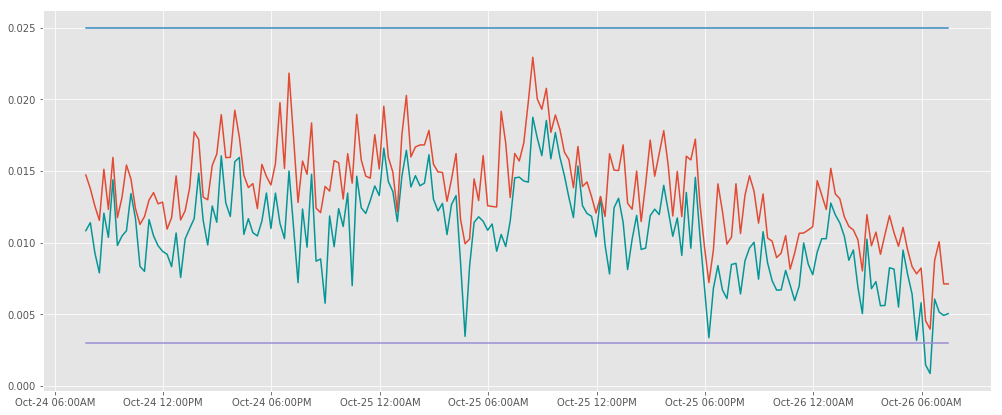

In [5]:
%autoreload 2
import pandas as pd
import pytz

%pylab inline
%matplotlib inline
matplotlib.style.use('ggplot')


# -------------------
# Charts
# -------------------
fig = plt.figure(figsize=(17,7)) # canvas size in inches
ax = fig.add_subplot(111)
aes = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}
#plt.xticks(range(len(x)), x)
strf_format='%b-%d %I:%M%p'
# strf_format='%d %H %Z'
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(strf_format, tz=pytz.timezone('US/Pacific')))
plt.plot(ds1, color=color_teal)
plt.plot(ds2)

x = ds1.index
y7 = [0.0250 for _ in x]
ds7 = pd.Series(index=pd.to_datetime(x, unit='ms', utc=False), data=y7)
plt.plot(ds7)

y7 = [0.003 for _ in x]
ds7 = pd.Series(index=pd.to_datetime(x, unit='ms', utc=False), data=y7)
plt.plot(ds7)

# y7 = [0.02 for _ in x]
# ds7 = pd.Series(index=pd.to_datetime(x, unit='ms', utc=False), data=y7)
# plt.plot(ds7)



# Analyzing Strat2

In [3]:
from arb.core.exh.backtest.accounts import BacktestingTradingAccount
from arb.notebook.strat2_analysis.mkds import get_ds_trading_result, get_results_for_a_mock_strategy


# -------------------
# Signals Environment
# -------------------
current_time = epoch.current_milli_time()
day_in_milli = 24 * 60 * 60 * 1000
gdax_trading_account = BacktestingTradingAccount('gdax', 'gdax')
cex_trading_account = BacktestingTradingAccount('cex', 'cex')

def get_window(days, t):
    start_time = epoch.to_str(t - day_in_milli * days)
    end_time = epoch.to_str(t)
    return (start_time, end_time)
    

amount = 10000.0
holding_period = 40.0
threshold_delta = 0.010
    
check_interval = 30  # In minutes
check_interval = 60  # In minutes
check_interval = 60  # In minutes

check_window = ("2017-09-11 00:00:00 PDT", "2017-09-22 07:00:00 PDT")
check_window = ("2017-09-11 00:00:00 PDT", "2017-09-24 20:00:00 PDT")
check_window = ("2017-09-16 00:00:00 PDT", "2017-09-26 06:00:00 PDT")

last_30_days = get_window(30, current_time)
last_20_days = get_window(20, current_time)
last_10_days = get_window(10, current_time)
last_5_days = get_window(5, current_time)
last_2_days = get_window(2, current_time)
last_1_days = get_window(1, current_time)
check_window = last_10_days

delta_ds, diff_ds = get_ds_trading_result(check_window, check_interval, amount, holding_period, threshold_delta,
                                          gdax_trading_account, cex_trading_account)


# usd_ds, eth_ds = get_results_for_a_mock_strategy(check_window, check_interval, amount, holding_period, threshold_delta,
#                                           gdax_trading_account, cex_trading_account)




INFO|mkds|79|[0] timestamp:1507264869000|date:2017-10-05 21:41:09 PDT
INFO|mkds|79|[50] timestamp:1507444869000|date:2017-10-07 23:41:09 PDT
INFO|mkds|79|[100] timestamp:1507624869000|date:2017-10-10 01:41:09 PDT
INFO|mkds|79|[150] timestamp:1507804869000|date:2017-10-12 03:41:09 PDT
INFO|mkds|79|[200] timestamp:1507984869000|date:2017-10-14 05:41:09 PDT
INFO|mkds|85|('2017-10-05 20:41:09 PDT', '2017-10-15 20:41:09 PDT')
INFO|mkds|86|(1507261269000, 1508125269000)
INFO|mkds|87|2017-10-09 15:41:09    0.019593
2017-10-09 19:41:09    0.013464
2017-10-10 03:41:09    0.010307
2017-10-10 06:41:09    0.010872
2017-10-10 07:41:09    0.010777
dtype: float64
INFO|mkds|88|2017-10-09 15:41:09    0.019593
2017-10-09 19:41:09    0.013464
2017-10-10 03:41:09    0.010307
2017-10-10 06:41:09    0.010872
2017-10-10 07:41:09    0.010777
dtype: float64


Populating the interactive namespace from numpy and matplotlib
2017-10-05 23:34:14    0.008984
2017-10-05 23:49:14    0.007109
2017-10-06 00:04:14    0.007265
2017-10-06 00:34:14    0.009263
2017-10-06 00:49:14    0.008401
dtype: float64
2017-10-05 23:34:14    0.007802
2017-10-05 23:49:14    0.006921
2017-10-06 00:04:14    0.005352
2017-10-06 00:34:14    0.009378
2017-10-06 00:49:14    0.008694
dtype: float64


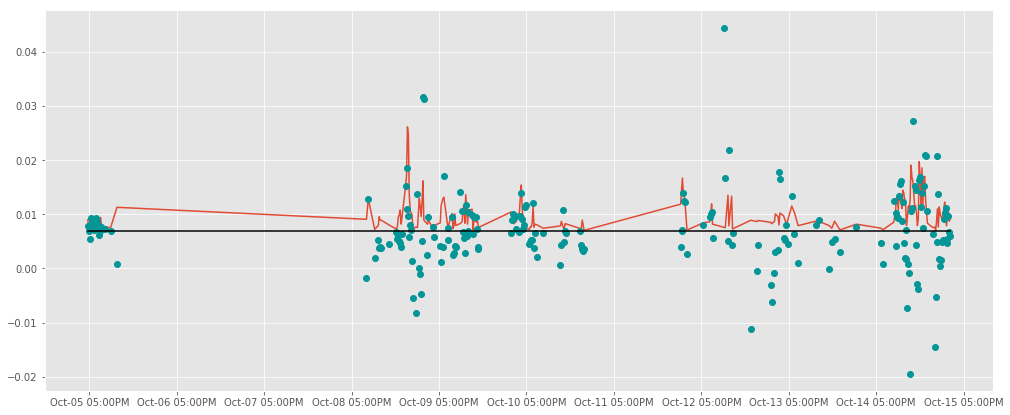

In [7]:
import pandas as pd
import pytz

%pylab inline
%matplotlib inline
matplotlib.style.use('ggplot')


# -------------------
# Charts
# -------------------
fig = plt.figure(figsize=(17,7)) # canvas size in inches
ax = fig.add_subplot(111)
aes = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}
#plt.xticks(range(len(x)), x)
strf_format='%b-%d %I:%M%p'
# strf_format='%d %H %Z'
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(strf_format, tz=pytz.timezone('US/Pacific')))
plt.plot(delta_ds)
plt.plot(diff_ds, 'o', color=color_teal)
# plt.plot(diff_ds)s

print delta_ds.head()
print diff_ds.head()
x = delta_ds.index
y7 = [0.007 for _ in x]
ds7 = pd.Series(index=pd.to_datetime(x, unit='ms', utc=False), data=y7)
plt.plot(ds7, color='black')

# y7 = [0.005 for _ in x]
# ds7 = pd.Series(index=pd.to_datetime(x, unit='ms', utc=False), data=y7)
# plt.plot(ds7)

Populating the interactive namespace from numpy and matplotlib


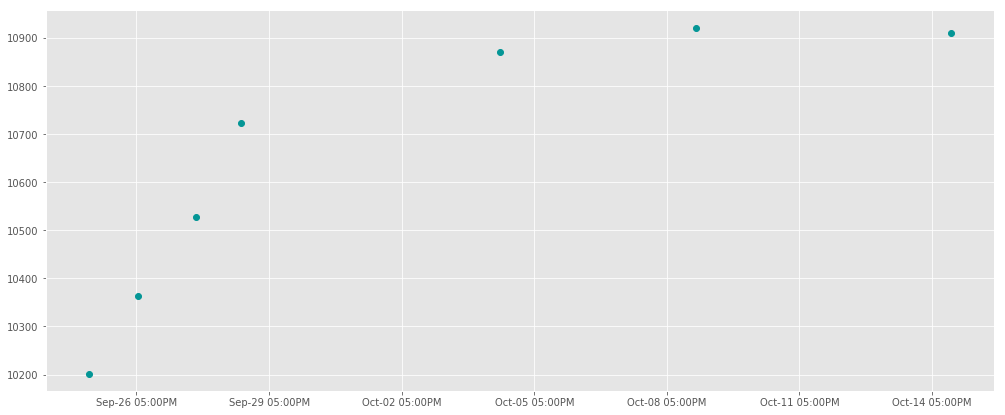

In [23]:
# print pd.to_datetime(epoch.to_long("2017-09-28 00:00:00 PDT"), unit='ms')

# t = pd.to_datetime(epoch.to_long("2017-09-28 00:00:00 PDT"), unit='ms')


# diff_ds[diff_ds.index > t]


usd_ds


import pandas as pd
import pytz

%pylab inline
%matplotlib inline
matplotlib.style.use('ggplot')


# -------------------
# Charts
# -------------------
fig = plt.figure(figsize=(17,7)) # canvas size in inches
ax = fig.add_subplot(111)
aes = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}
#plt.xticks(range(len(x)), x)
strf_format='%b-%d %I:%M%p'
# strf_format='%d %H %Z'
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(strf_format, tz=pytz.timezone('US/Pacific')))
# plt.plot(delta_ds)
plt.plot(usd_ds, 'o', color=color_teal)




# Chart Audits

In [23]:
%autoreload 2
from arb.notebook.mkds_audits import get_ds

check_window = ("2017-09-12 23:00:00 PDT", "2017-09-22 09:00:00 PDT")
check_window = ("2017-09-12 23:00:00 PDT", "2017-09-22 09:00:00 PDT")

run_id = 'server_mock_live__004'
check_window = ("2017-09-24 00:00:00 PST", "2017-09-24 15:00:00 PST")

ds1, ds2, ds3 = get_ds(run_id, check_window)
# ds1, ds2, ds3 = get_ds('backtesting__001', check_window)

print ds1.head()
print ds2.head()
print ds3.head()
    

INFO|mkds_audits|40|{
  "sort": [
    {
      "timestamp__long": {
        "order": "asc"
      }
    }
  ], 
  "query": {
    "bool": {
      "must": [
        {
          "match": {
            "strategy_run_id.raw": "server_mock_live__004"
          }
        }, 
        {
          "range": {
            "timestamp__long": {
              "gte": 1506236400000, 
              "lte": 1506290400000
            }
          }
        }
      ]
    }
  }, 
  "size": 1000
}
INFO|mkds_audits|40|{
  "sort": [
    {
      "timestamp__long": {
        "order": "asc"
      }
    }
  ], 
  "query": {
    "bool": {
      "must": [
        {
          "match": {
            "strategy_run_id.raw": "server_mock_live__004"
          }
        }, 
        {
          "range": {
            "timestamp__long": {
              "gte": 1506236400000, 
              "lte": 1506290400000
            }
          }
        }
      ]
    }
  }, 
  "size": 1000
}


2017-09-24 13:48:45.838    20096.872739
2017-09-24 13:48:49.193    20194.460655
2017-09-24 16:45:10.900    20293.951513
2017-09-24 16:45:14.292    20395.297072
2017-09-24 16:45:17.693    20497.525188
dtype: float64
2017-09-24 13:48:45.838    17000.000000
2017-09-24 13:48:49.193    14000.000000
2017-09-24 16:45:10.900    10998.532877
2017-09-24 16:45:14.292     7998.936558
2017-09-24 16:45:17.693     4998.941525
dtype: float64
2017-09-24 13:48:45.838     3096.872739
2017-09-24 13:48:49.193     6194.460655
2017-09-24 16:45:10.900     9295.418636
2017-09-24 16:45:14.292    12396.360514
2017-09-24 16:45:17.693    15498.583663
dtype: float64


Populating the interactive namespace from numpy and matplotlib


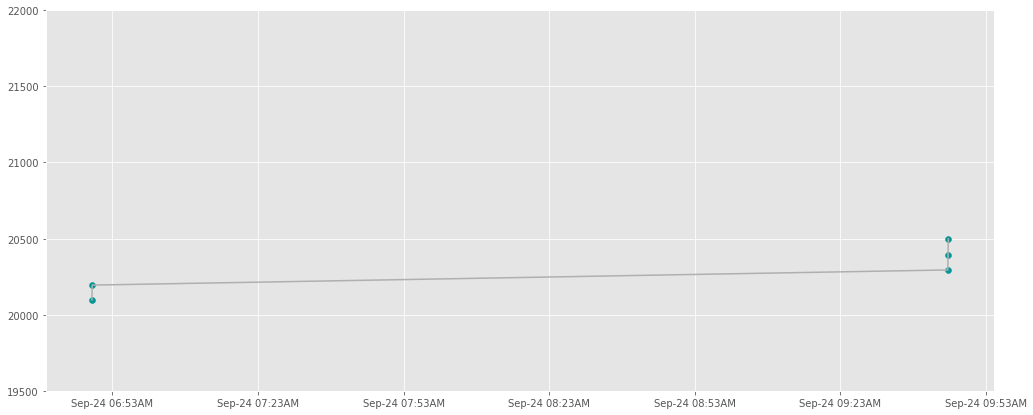

In [24]:
%autoreload 2
import pandas as pd
import pytz
import matplotlib.dates as dates
import matplotlib.dates as mdates

%pylab inline
%matplotlib inline
matplotlib.style.use('ggplot')

# -------------------
# Charts
# -------------------
fig = plt.figure(figsize=(17,7)) # canvas size in inches
ax = fig.add_subplot(111)
ax.set_ylim(19500, 22000)
aes = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}
#plt.xticks(range(len(x)), x)
strf_format='%d %H %Z'
strf_format='%b-%d %I:%M%p'

ax.xaxis.set_major_formatter(dates.DateFormatter(strf_format, tz=pytz.timezone('US/Pacific')))
plt.plot(ds1.index, ds1.tolist(), color=color_light_gray)
plt.scatter(ds1.index, ds1.tolist(), color=color_teal)

# # Chart2
# fig2 = plt.figure(figsize=(17,7)) # in inches
# ax2 = fig2.add_subplot(111)
# ax2.xaxis.set_major_formatter(dates.DateFormatter(strf_format, tz=pytz.timezone('US/Pacific')))

# # ylim(ymax=3) # adjust the max leaving min unchanged
# # ylim(ymin=1)
     
# # ax2.set_title("Distribution By Prices", fontsize=20)
# # ax2.set_xlabel('Prices', fontsize=16)
# # ax2.set_ylabel('Counts', fontsize=16)
# aes = {
#     "edgecolor": "#ffffff",
#     "color": "#008AB8"
# }
# ds2.plot(kind='bar', ax=ax2, **aes)


# # Chart3
# fig3 = plt.figure(figsize=(17,7)) # in inches
# ax3 = fig3.add_subplot(111)
# strf_format='%b-%d %I:%M%p'
# ax3.xaxis.set_major_formatter(dates.DateFormatter(strf_format, tz=pytz.timezone('US/Pacific')))
# ax3.plot_date(ds3.index.to_pydatetime(), ds3, 'bo')
# ax3.plot_date(ds2.index.to_pydatetime(), ds2, 'ro')



--------------------------------------------------

--------------------------------------------------


In [ ]:
%autoreload 2
from arb.utils import epoch
from arb import es
from arb.utils.string import pretty_json
from arb.strat import quick
import pandas as pd

search_window = 10000 # 10 seconds
millis_in_minute = 1000 * 60
millis_in_hour = 1000 * 60 * 60

# earliest time
"2017-08-20 16:27:09 PDT"
1503271629989

starting_amount = 10000
starting_time = 1503271629989
x = []
y = []
diff = quick.try_delta_buy_gdax_sell_cex(starting_amount, starting_time, search_window, 0)
for i in range(48):
    t = i * millis_in_hour + starting_time
    ts = epoch.to_str(t)
    diff = quick.try_delta_buy_gdax_sell_cex(starting_amount, t, search_window, diff)
    x.append(t)
    y.append(diff)
    
    # keeping track of operations
    if i % 10 == 0:
        print i

#     print 'time is {0}: {1}'.format(ts, str(diff))
x_index = pd.to_datetime(x, unit='ms')
ds = pd.Series(index=x_index, data=y)


print ds.head(10)

Populating the interactive namespace from numpy and matplotlib


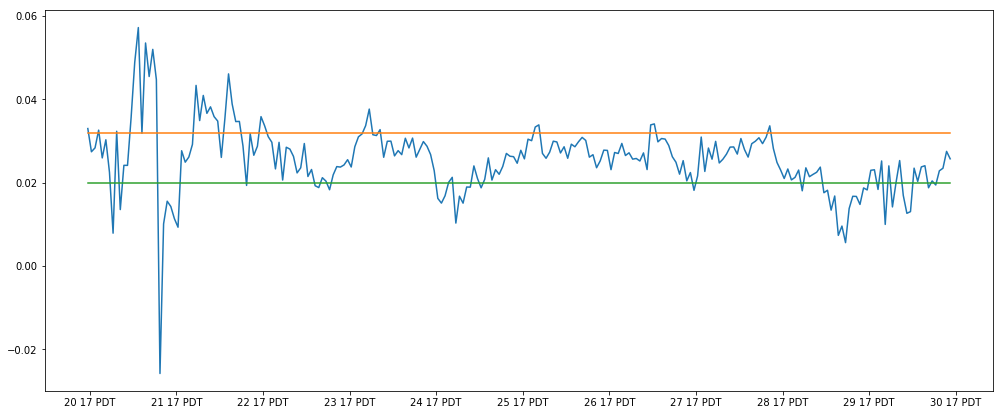

In [93]:
#import matplotlib.pyplot as plt
import pandas as pd
import pytz

%pylab inline
%matplotlib inline

# ds1 = pd.Series(data, index=pd.date_range('2005-10-09', periods=5, freq='W'))
# ds2 = pd.Series(numpy.arange(10,21,2), index=pd.date_range('2003-01-09', periods=6, freq='W'))
# matplotlib.pyplot.plot(ds1)
# matplotlib.pyplot.plot(ds2)
# matplotlib.pyplot.show()

fig = plt.figure(figsize=(17,7)) # canvas size in inches
ax = fig.add_subplot(111)

aes = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}
#plt.xticks(range(len(x)), x)
strf_format='%d %H %Z'
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(strf_format, tz=pytz.timezone('US/Pacific')))
plt.plot(ds)

y2 = [0.032 for _ in x]
ds2 = pd.Series(index=pd.to_datetime(x, unit='ms', utc=False), data=y2)
plt.plot(ds2)

y2 = [0.02 for _ in x]
ds2 = pd.Series(index=pd.to_datetime(x, unit='ms'), data=y2)
plt.plot(ds2)
